# 미국금리가 채권에 미치는 영향
- 채권/사채 출처 : http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmdmenuId=MDC0201010105
- 미국 금리 출처 : https://kr.investing.com/economic-calendar/interest-rate-decision-168
- 한국 금리 출처 : https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643
- 주가지수에는 주가 변동에 따른 자본손익만이 반영되지만 채권지수에는 이자수익과 자본수익이 동시에 반영되어
  주가지수는 큰 등락이 보이지만 채권지수는 중장기적으로 상승하는 구조를 갖게 된다.

In [37]:
# 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import platform
import datetime

In [38]:
# 운영체제별 한글 폰트 설정
if platform.system()=='Windows':
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')

In [39]:
# 데이터 부르기
krx_df=pd.read_csv('../pro4_Data/KRX채권지수.csv',encoding='euc_kr')
prime_df=pd.read_csv('../pro4_Data/국고채프라임지수.csv',encoding='euc_kr')
usa_interate_df=pd.read_csv('../pro4_Data/미국금리.csv',encoding='euc_kr')
korea_interate_df=pd.read_csv('../pro4_Data/한국금리.csv',encoding='utf-8')

## KRX채권 데이터 가공

In [40]:
# 필요열만 추출
krx_df_my=krx_df.iloc[:,[0,1,3,5,7,9,11,12,13]]

In [41]:
# 열이름 바꾸기
krx_df_my.columns=['일자','총수익지수','순가격지수','제로재투자지수','콜재투자지수','시장가격지수','듀레이션','컨벡시티','YTM']

- 용어 설명
 1. KRX채권지수 => 회사채
   - 신용등급 B++이상, 잔존개월 3개월 이상 등 여러 조건에 만족이 되어야 지수로 계산되어 산출됩니다.
   - 총수익지수, 순가격지수, 제로재투자지수, 콜재투자지수, 시장가격지수 총 5개 지수로 구성되어있습니다.
   - 주식에서 우량주들로만 구성되어있는  채권계의 코스피 라고 할 수 있습니다
 2. 국고채프라임지수 => 국채
   - 만기 3년, 5년, 10년 국고채 지표종목 및 직전 지표종목이라는 6가지 항목을 가지고 계산하는 지수입니다.
   - 총수익지수, 순가격지수 총 2개만 있음
 3. 듀레이션
   - 원금을 회수하는데 걸리는 평균기간으로 값이 클수록 채권의 만기가 늘어난다는 것을 알 수 있습니다.
 4. 컨벡시티
   - 듀레이션을 미분한 값입니다.
   - 채권가격과 만기수익률의 반리례 관계를 보여줌 => 기억하기
 5. YTM (만기수익률)

In [42]:
# 일자를 오름차순으로 바꾸고 인덱스를 0부터 순서대로 정해짐
krx_df=krx_df.sort_values('일자')
krx_df.index=range(len(krx_df))
krx_df

,일자,총수익지수_종가,총수익지수_대비,순가격지수_종가,순가격지수_대비,제로재투자지수_종가,제로재투자지수_대비,콜재투자지수_종가,콜재투자지수_대비,시장가격지수_종가,시장가격지수_대비,듀레이션,컨벡시티,YTM
0,2019/01/02,180.10,0.10,108.04,0.05,175.38,0.08,178.17,0.08,109.92,0.05,5.066,69.339,1.979
1,2019/01/03,180.06,-0.04,108.01,-0.03,175.34,-0.04,178.13,-0.04,109.89,-0.03,5.075,69.733,1.978
2,2019/01/04,180.14,0.08,108.06,0.05,175.42,0.08,178.21,0.08,109.95,0.06,5.085,69.955,1.966
3,2019/01/05,180.15,0.01,108.06,0.00,175.43,0.01,178.22,0.01,109.95,0.00,5.086,69.996,1.966
4,2019/01/06,180.16,0.01,108.05,-0.01,175.44,0.01,178.23,0.01,109.96,0.01,5.085,69.979,1.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2022/06/26,175.45,0.02,97.42,0.00,171.64,0.01,175.23,0.01,99.15,0.01,5.267,78.645,3.555
1272,2022/06/27,174.86,-0.59,97.09,-0.33,171.15,-0.49,174.74,-0.49,98.81,-0.34,5.258,78.493,3.611
1273,2022/06/28,175.06,0.20,97.19,0.10,171.32,0.17,174.91,0.17,98.92,0.11,5.273,78.926,3.610
1274,2022/06/29,175.10,0.04,97.21,0.02,171.35,0.03,174.95,0.04,98.94,0.02,5.272,78.901,3.617


In [43]:
# 일자열 타입 바꾸기
krx_df_my['일자']=pd.to_datetime(krx_df_my['일자'])

In [44]:
# 데이터 확인
krx_df_my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일자       1276 non-null   datetime64[ns]
 1   총수익지수    1276 non-null   float64       
 2   순가격지수    1276 non-null   float64       
 3   제로재투자지수  1276 non-null   float64       
 4   콜재투자지수   1276 non-null   float64       
 5   시장가격지수   1276 non-null   float64       
 6   듀레이션     1276 non-null   float64       
 7   컨벡시티     1276 non-null   float64       
 8   YTM      1276 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 89.8 KB


## 국고채프라임지수 데이터 가공

In [45]:
# 필요한열만 추출
prime_df_my=prime_df.iloc[:,[0,1,3,11,12,13]]

In [46]:
# 열이름 변경
prime_df_my.columns=['일자','총수익지수','순가격지수','듀레이션','컨벡시티','YTM']

In [47]:
# 일자를 오름차순으로 바꾸고 인덱스를 0부터 순서대로 정해짐
prime_df_my=prime_df_my.sort_values('일자')
prime_df_my.index=range(len(prime_df_my))

In [48]:
# 일자열 타입 바꾸기
prime_df_my['일자']=pd.to_datetime(prime_df_my['일자'])

In [49]:
# 데이터 확인
prime_df_my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      863 non-null    datetime64[ns]
 1   총수익지수   863 non-null    float64       
 2   순가격지수   863 non-null    float64       
 3   듀레이션    863 non-null    float64       
 4   컨벡시티    863 non-null    float64       
 5   YTM     863 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 40.6 KB


## 미국금리(일 단위) 데이터 가공

In [50]:
# 데이터 카피
usa_interate_df_my=usa_interate_df

In [51]:
# 실제열에 있는 퍼센트를 없애고 실수형으로 바꾸기
usa_interate_df_my['실제']=usa_interate_df_my['실제'].apply(lambda x:x.replace('%',''))
usa_interate_df_my['이전']=usa_interate_df_my['이전'].apply(lambda x:x.replace('%',''))
usa_interate_df_my=usa_interate_df_my.astype({'실제':'float64'})
usa_interate_df_my=usa_interate_df_my.astype({'이전':'float64'})

In [52]:
# 날짜열 데이터 타입변경
usa_interate_df_my['날짜']=pd.to_datetime(usa_interate_df_my['날짜'])

In [53]:
# 새로운 열 만들기
usa_interate_df_my['금리 등락율']=usa_interate_df_my['실제'].sub(usa_interate_df_my['이전'])

In [54]:
# 데이터 확인
usa_interate_df_my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1296 non-null   datetime64[ns]
 1   실제      1296 non-null   float64       
 2   이전      1296 non-null   float64       
 3   금리 등락율  1296 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 40.6 KB


## 한국금리 데이터 가공

In [55]:
# 데이터 카피
korea_interate_df_my=korea_interate_df

In [56]:
# 날짜열 데이터 타입변경
korea_interate_df_my['날짜']=pd.to_datetime(korea_interate_df_my['날짜'],format='%Y-%m')

In [57]:
# 새로운 열 만들기
korea_interate_df_my['금리 등락율']=korea_interate_df_my['실제'].sub(korea_interate_df_my['이전'])

In [58]:
# 데이터 확인
korea_interate_df_my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      866 non-null    datetime64[ns]
 1   실제      866 non-null    float64       
 2   이전      866 non-null    float64       
 3   금리 등락율  866 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 27.2 KB


## 분석

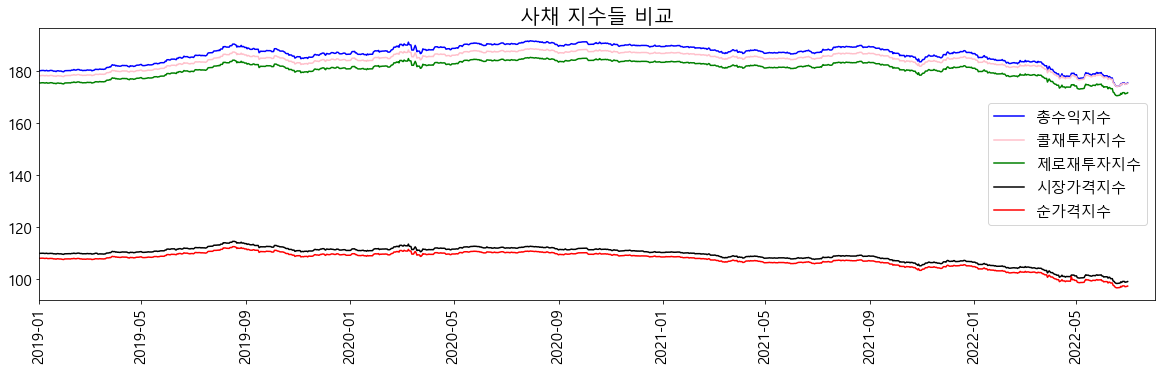

In [59]:
# KRX채권 지수들을 비교하는 그래프 그리기
plt.figure(figsize=(20,5))
plt.rc('font',size=15)
plt.plot(krx_df_my['일자'],krx_df_my['총수익지수'],c='blue',label='총수익지수')
plt.plot(krx_df_my['일자'],krx_df_my['콜재투자지수'],c='pink',label='콜재투자지수')
plt.plot(krx_df_my['일자'],krx_df_my['제로재투자지수'],c='green',label='제로재투자지수')
plt.plot(krx_df_my['일자'],krx_df_my['시장가격지수'],c='black',label='시장가격지수')
plt.plot(krx_df_my['일자'],krx_df_my['순가격지수'],c='red',label='순가격지수')
plt.xlim(datetime.date(2019,1,1),datetime.date(2022,8,1))
plt.xticks(rotation=90)
plt.legend(loc=5)
plt.title('사채 지수들 비교',size=20)
plt.show()

- 하지만 5개 지수들이 동일한 모양으로 되어있어서 5개 지수중에 가장 높은 총수익지수를 대표지수로 삼고 분석을 진행하였습니다.

In [60]:
# 각 지수들의 상관계수
krx_df_my.corr()

,총수익지수,순가격지수,제로재투자지수,콜재투자지수,시장가격지수,듀레이션,컨벡시티,YTM
총수익지수,1.000000,0.705808,0.999929,0.997170,0.689682,0.801054,0.711227,-0.894979
순가격지수,0.705808,1.000000,0.698885,0.651955,0.999425,0.164700,0.021099,-0.905386
제로재투자지수,0.999929,0.698885,1.000000,0.997920,0.682631,0.806757,0.718090,-0.890378
콜재투자지수,0.997170,0.651955,0.997920,1.000000,0.634801,0.840441,0.759399,-0.862345
시장가격지수,0.689682,0.999425,0.682631,0.634801,1.000000,0.142241,-0.000771,-0.895483
듀레이션,0.801054,0.164700,0.806757,0.840441,0.142241,1.000000,0.987061,-0.470444
컨벡시티,0.711227,0.021099,0.718090,0.759399,-0.000771,0.987061,1.000000,-0.342098
YTM,-0.894979,-0.905386,-0.890378,-0.862345,-0.895483,-0.470444,-0.342098,1.000000


- 즉, 채권가격과 만기수익율이 반비례관계라고 확인할 수 있습니다.

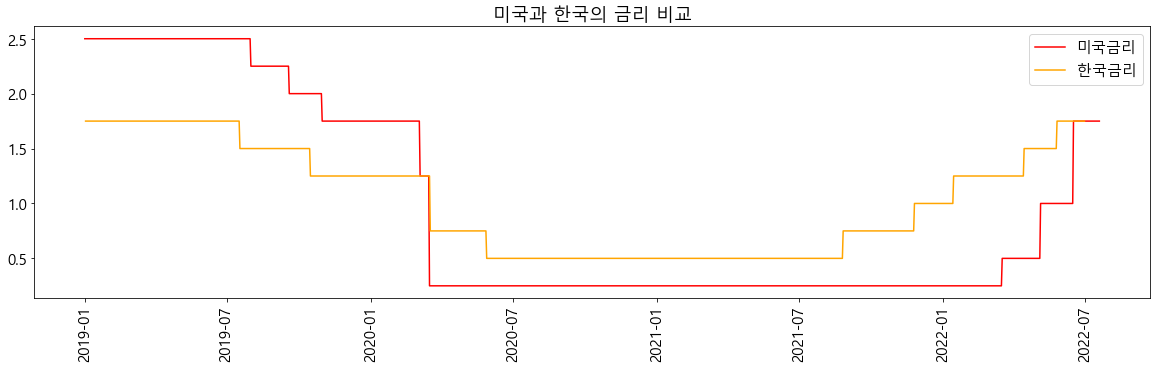

In [61]:
# 미국금리와 한국금리 비교 그래프
plt.figure(figsize=(20,5))
plt.plot(usa_interate_df_my['날짜'],usa_interate_df_my['실제'],c='red',label='미국금리')
plt.plot(korea_interate_df_my['날짜'],korea_interate_df_my['실제'],c='orange',label='한국금리')
plt.rc('axes',unicode_minus=False)
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.title('미국과 한국의 금리 비교')
plt.show()

- 한국이 먼저 금리가 오르는 경향이 보이고 있습니다.

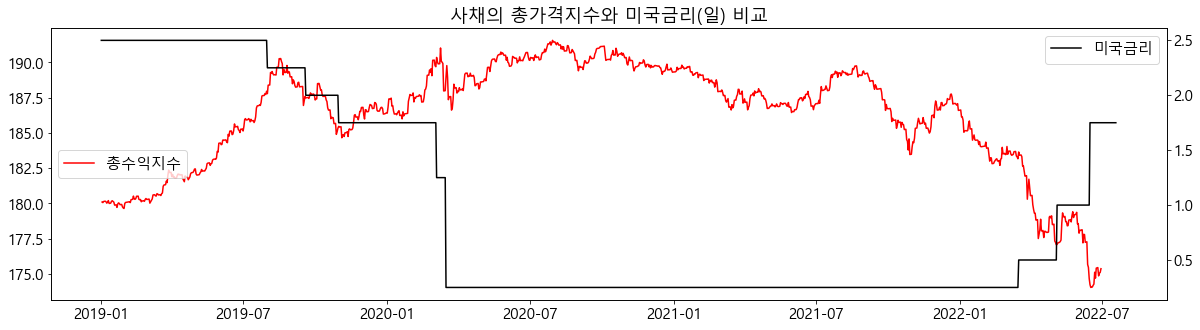

In [62]:
# KRX채권지수의 총가격지수와 미국금리(일) 등락율 비교 그래프
plt.figure(figsize=(20,5))
plt.plot(krx_df_my['일자'],krx_df_my['총수익지수'],c='red',label='총수익지수')
plt.legend(loc=6)
plt.twinx()
plt.plot(usa_interate_df_my['날짜'],usa_interate_df_my['실제'],c='black',label='미국금리')
plt.rc('axes',unicode_minus=False)
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.title('사채의 총가격지수와 미국금리(일) 비교')
plt.show()

- 19년도 초에는 금리가 높아 회사채를 사고자 하는 사람이 많아져 총수익지수가 높아지는 것을 확인
- 20년도 코로나가 발생하자 국민들의 대출이자 부담완화와 가계소비를 늘리기 위해 금리를 0%대로 내린 것을 확인
- 이로인해 채권을 사는 사람은 줄어들어 총수익지수도 계속 감소하는 것을 확인
- 하지만 러시아와 우크라이나 전쟁, 갑자기 폭등한 물가나 원자재 등의 이유때문이지
  금리는 인상되고있지만 총수익지수는 점점 하락하는 것을 볼 수 있습니다.

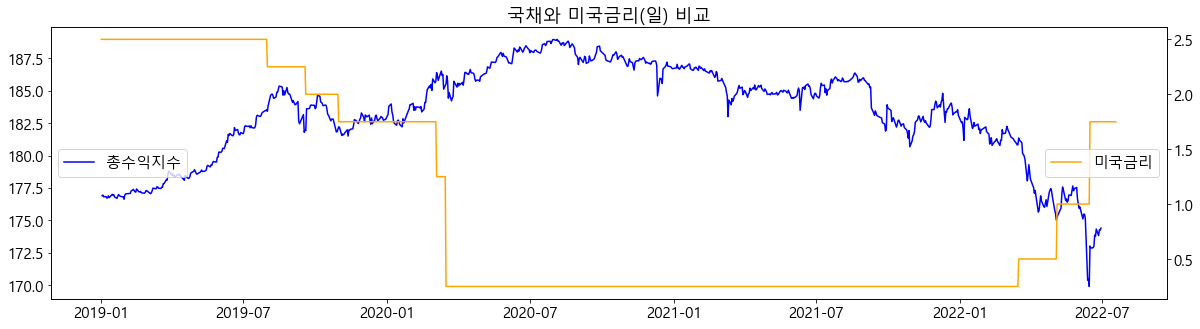

In [63]:
# 국고채프라임지수의 총가격지수와 미국금리(일) 등락율 비교 그래프
plt.figure(figsize=(20,5))
plt.plot(prime_df_my['일자'],prime_df_my['총수익지수'],c='blue',label='총수익지수')
plt.legend(loc=6)
plt.twinx()
plt.plot(usa_interate_df_my['날짜'],usa_interate_df_my['실제'],c='orange',label='미국금리')
plt.rc('axes',unicode_minus=False)
plt.xticks(rotation=90)
plt.legend(loc=5)
plt.title('국채와 미국금리(일) 비교')
plt.show()

- 사채와 비교했던거와 동일하다는 것을 확인 => 사채와 국채를 비교해보자고 생각함

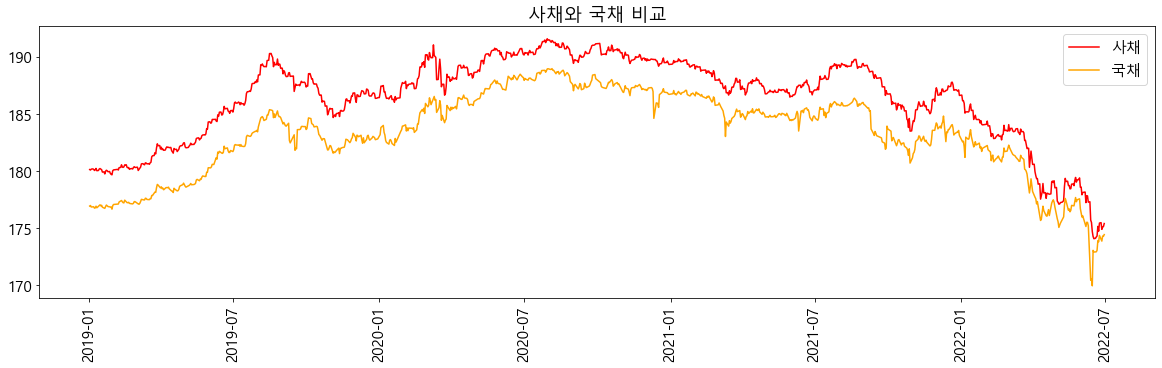

In [64]:
# KRX채권지수의 총가격지수와 국고채프라임지수의 총가격지수 비교 그래프
plt.figure(figsize=(20,5))
plt.plot(krx_df_my['일자'],krx_df_my['총수익지수'],c='red',label='사채')
plt.plot(prime_df_my['일자'],prime_df_my['총수익지수'],c='orange',label='국채')
plt.rc('axes',unicode_minus=False)
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.title('사채와 국채 비교')
plt.show()

- 작년까지만 해도 국채보다는 사채에 관심이 더 많이 있는 경향이 보였지만 올해들어
  사채와 국채의 격차가 줄어들었는데 이는 시장경제 불안과 전쟁으로 인해 
  안정성이 더 높은 국채에 많은 관심이 보이는 걸로 보임.   
    
  올해말에는 국채지수가 사채지수를 추월할 것으로 예상!!!

### 결론
- 코로나가 발생한 20년도 이전에는 금리가 오르면 채권/사채의 지수도 상승하여 2개의 지표가 의미가 있다고 보여지나
  코로나의 영향으로 0%의 금리가 1년간 유지되면서 20년도 이후의 금리와 채권/사채의 관계를 알아보기에는 
  어렵다고 판단하였습니다. 하지만 강세로 여겨졌던 사채보다 국채가 강세로 예상되고 현 금리도 1.75%이고
  오를거라고 예상이 되므로 국채가격이 더 하락하여 나라에서는 국채를 구매하게 유도하여 경제를 활성화 시키는데
  발화점 역할을 할 수 있게 많은 지원을 하여야 한다고 결론을 도출하였습니다.